In [1]:
# example code for working with geotiff files

from osgeo import gdal

def get_geotiff_boundaries(geotiff_path):
    # Open the GeoTIFF file
    dataset = gdal.Open(geotiff_path)

    if dataset is None:
        print("Error: Unable to open the GeoTIFF file.")
        return None

    # Get the geotransform information
    geotransform = dataset.GetGeoTransform()

    # Extracting corner coordinates
    x_min = geotransform[0]
    y_max = geotransform[3]
    x_max = x_min + geotransform[1] * dataset.RasterXSize
    y_min = y_max + geotransform[5] * dataset.RasterYSize

    dataset = None

    return x_min, x_max, y_min, y_max

# prints the boundaries of the read tiff file

geotiff_path = "C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/NEON_lai-spectrometer-line/NEON.D17.TEAK.DP2.30012.001.2021-07.basic.20240422T213435Z.RELEASE-2024/NEON_D17_TEAK_DP2_20210714_175119_LAI.tif"

boundaries = get_geotiff_boundaries(geotiff_path)
if boundaries:
    print("Boundaries of GeoTIFF:")
    print("Min X:", boundaries[0])
    print("Max X:", boundaries[1])
    print("Min Y:", boundaries[2])
    print("Max Y:", boundaries[3])

#prints height, width, and crs of given tiff file

dataset = gdal.Open(geotiff_path)

width = dataset.RasterXSize
height = dataset.RasterYSize
metadata = dataset.GetMetadata()
projection = dataset.GetProjection()

print (width)
print (height)
print (projection)

for key, value in metadata.items():
    print(key, ":", value)

# prints the value for pixel with given x, y coordinates

x = 500
y = 8000

pixel_values = []
for band_num in range(1, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(band_num)
    pixel_value = band.ReadAsArray(x, y, 1, 1)[0][0]
    pixel_values.append(pixel_value)

print("Pixel values at ({}, {}):".format(x, y))
print(pixel_values)


c:\Users\allen\.conda\envs\geospatial\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Boundaries of GeoTIFF:
Min X: 320386.0
Max X: 321715.0
Min Y: 4090523.0
Max Y: 4108448.0
1329
17925
PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
AREA_OR_POINT : Area
Pixel values at (500, 8000):
[1.2329257173854913]


In [2]:
from glob import glob
import os
import pandas as pd
from osgeo import gdal

# sets the path for location of geotiffs, location for csv file
flight_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/NEON_lai-spectrometer-line/NEON.D17.TEAK.DP2.30012.001.2021-07.basic.20240422T213435Z.RELEASE-2024/'
mosaic_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/NEON_lai-spectrometer-mosaic/NEON.D17.TEAK.DP3.30012.001.2021-07.basic.20240422T213526Z.RELEASE-2024/'
csv_save_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/'

flight_tiff_fullpath_filelist = [file for file in glob(flight_path + '/*.tif') if 'error' not in file]
mosaic_tiff_fullpath_filelist = [file for file in glob(mosaic_path + '/*.tif') if 'error' not in file]

flight_tiff_filename_list = [os.path.basename(file) for file in flight_tiff_fullpath_filelist]
mosaic_tiff_filename_list = [os.path.basename(file) for file in mosaic_tiff_fullpath_filelist]

# function for reading in the path for tif file, and returns the x_min, x_max, y_min, y_max of the tif file
def get_geotiff_boundaries(geotiff_path):
    # Open the GeoTIFF file
    dataset = gdal.Open(geotiff_path)

    if dataset is None:
        print("Error: Unable to open the GeoTIFF file.")
        return None

    # Get the geotransform information
    geotransform = dataset.GetGeoTransform()

    # Extracting corner coordinates
    x_min = geotransform[0]
    y_max = geotransform[3]
    x_max = x_min + geotransform[1] * dataset.RasterXSize
    y_min = y_max + geotransform[5] * dataset.RasterYSize

    # closes the dataset or it will remain accessed in file explorer
    dataset = None

    return x_min, x_max, y_min, y_max

x_min_list = []
x_max_list = []
y_min_list = []
y_max_list = []

for flight_tiff_filename in flight_tiff_fullpath_filelist:
    boundaries = get_geotiff_boundaries(flight_tiff_filename)
    x_min_list.append(boundaries[0])
    x_max_list.append(boundaries[1])
    y_min_list.append(boundaries[2])
    y_max_list.append(boundaries[3])

data = {'Filename': flight_tiff_filename_list,
        'xmin': x_min_list,
        'xmax': x_max_list,
        'ymin': y_min_list,
        'ymax': y_max_list}

# dataframe for flightline tif file names and data (x_min, x_max, y_min, y_max)
flight_tiff_df = pd.DataFrame(data)

x_min_list.clear()
x_max_list.clear()
y_min_list.clear()
y_max_list.clear()

for mosaic_tiff_filename in mosaic_tiff_fullpath_filelist:
    boundaries = get_geotiff_boundaries(mosaic_tiff_filename)
    x_min_list.append(boundaries[0])
    x_max_list.append(boundaries[1])
    y_min_list.append(boundaries[2])
    y_max_list.append(boundaries[3])

data = {'Filename': mosaic_tiff_filename_list,
        'xmin': x_min_list,
        'xmax': x_max_list,
        'ymin': y_min_list,
        'ymax': y_max_list}

# dataframe for mosaic tif file names and data (x_min, x_max, y_min, y_max)
mosaic_tiff_df = pd.DataFrame(data)

# print(flight_tiff_df.iloc[0])

# pd.set_option('display.expand_frame_repr', False)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(flight_tiff_df)

# saves dataframes to flightline and mosaic csv files containing tif file name and xy boundaries
csv_filename = 'TEAK_LAI_flightline_xy.csv'
flight_tiff_df.to_csv(csv_save_path + csv_filename, index = False)

csv_filename = 'TEAK_LAI_mosaic_xy.csv'
mosaic_tiff_df.to_csv(csv_save_path + csv_filename, index = False)


In [3]:
import pandas as pd

TEAK_plotloc_csv = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK/NEON_struct-plant/TEAK_plotloc_allyears_2022.csv'

# Reads in plot locations and creates list of unique namedLocations based on most recent date of field measurements
TEAK_plotloc_df = pd.read_csv(TEAK_plotloc_csv)
TEAK_plotloc_df = TEAK_plotloc_df.sort_values(by = 'date', ascending = False)
TEAK_plotloc_unique_df = TEAK_plotloc_df.drop_duplicates(subset = 'namedLocation')
TEAK_plotloc_unique_df = TEAK_plotloc_unique_df.sort_values(by = 'namedLocation', ascending = True)

# pd.set_option('display.expand_frame_repr', False)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(TEAK_plotloc_unique_df)

# saves unique plot locations to csv in correct directory
csv_filename = 'TEAK_plotloc_uniquemostrecent_abbrev.csv'
only_columns = ['namedLocation', 'easting', 'northing']

TEAK_plotloc_unique_df[only_columns].to_csv(csv_save_path + csv_filename, index = False)

In [4]:
import pandas as pd

csv_save_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/'
flightline_csv_filename = 'TEAK_LAI_flightline_xy.csv'
mosaic_csv_filename = 'TEAK_LAI_mosaic_xy.csv'
plotloc_csv_filename = 'TEAK_plotloc_uniquemostrecent_abbrev.csv'
TEAK_shapefile_dir = 'C:\\Users\\allen\\OneDrive\\Desktop\\Work\\Scripts\\small footprint\\shapefiles\\TEAK\\indiv_shp'

flight_tiff_df = pd.read_csv(csv_save_path + flightline_csv_filename)
mosaic_tiff_df = pd.read_csv(csv_save_path + mosaic_csv_filename)
TEAK_plotloc_unique_df = pd.read_csv(csv_save_path + plotloc_csv_filename)

# if column for tiff file names is not found, create it
if 'Tiff file' not in TEAK_plotloc_unique_df.columns:
    TEAK_plotloc_unique_df['Tiff File'] = ''

# Looks for each plot x and y coordinates, and sees if the plot is within the xmin, xmax, ymin, ymax of the tiff files.  
# If it is, append file name to 'Tiff File' column
for plot_index, loc_row in TEAK_plotloc_unique_df.iterrows():
    easting = round(loc_row['easting'])
    northing = round(loc_row['northing'])
    flight_filenames = []

    for f_index, flight_row in flight_tiff_df.iterrows():
        if ((easting - 20 >= flight_row['xmin']) and (easting + 20 <= flight_row['xmax'])
            and (northing - 20 >= flight_row['ymin']) and (northing + 20 <= flight_row['ymax'])):

            TEAK_plotloc_unique_df['Found'] = 'YES'
            flight_filenames.append(flight_row['Filename'])

    flight_filenames_str = '/'.join(flight_filenames)
    TEAK_plotloc_unique_df.at[plot_index, 'Tiff File'] = flight_filenames_str

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(TEAK_plotloc_unique_df)

# updates the csv file with the new column with tif file names that plots were found within
TEAK_plotloc_unique_df.to_csv(csv_save_path + plotloc_csv_filename, index = False)
complete_save_path = csv_save_path + plotloc_csv_filename
print (complete_save_path)

C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/TEAK_plotloc_uniquemostrecent_abbrev.csv


In [33]:
import geopandas as gpd
import os
from osgeo import gdal
import numpy as np

def process_shapefiles(shapefile_directory, csv_save_path, flightline_csv_filename):
    # Read the flightline CSV into a DataFrame
    flight_tiff_df = pd.read_csv(os.path.join(csv_save_path, flightline_csv_filename))

    # Prepare a list to store shapefile and matching TIFF information
    data = []

    # Function to get bounding box of a shapefile
    def get_shapefile_bounds(shapefile_path):
        gdf = gpd.read_file(shapefile_path)
        return gdf.total_bounds  # returns [xmin, ymin, xmax, ymax]

    # Iterate through each shapefile in the directory
    for shapefile in os.listdir(shapefile_directory):
        if shapefile.endswith('.shp'):
            shapefile_path = os.path.join(shapefile_directory, shapefile)
            shapefile_name = shapefile.replace('.shp', '')
            shapefile_bounds = get_shapefile_bounds(shapefile_path)
            xmin, ymin, xmax, ymax = shapefile_bounds

            # List to collect all matching TIFFs for the current shapefile
            matching_flightlines = []

            # Check each flightline TIFF's boundary
            for f_index, flight_row in flight_tiff_df.iterrows():
                tiff_xmin = flight_row['xmin']
                tiff_ymin = flight_row['ymin']
                tiff_xmax = flight_row['xmax']
                tiff_ymax = flight_row['ymax']

                # Check for intersection between shapefile bounds and TIFF bounds
                if not (xmax < tiff_xmin or xmin > tiff_xmax or ymax < tiff_ymin or ymin > tiff_ymax):
                    matching_flightlines.append(flight_row['Filename'])

            # Determine if any matching TIFFs were found
            found_status = "YES" if matching_flightlines else "NO"

            # Append shapefile and matched TIFFs to the data list
            data.append({
                "namedLocation": shapefile_name,
                "Matching TIFFs": '/'.join(matching_flightlines),
                "Found": found_status
            })

    # Convert data to DataFrame and save as CSV
    output_df = pd.DataFrame(data)
    output_csv_path = os.path.join(csv_save_path, "matching_shapefiles_tiffs.csv")
    output_df.to_csv(output_csv_path, index=False)

    # Display the path of the file written
    print(f"CSV file has been saved to: {output_csv_path}")

process_shapefiles(TEAK_shapefile_dir, csv_save_path, flightline_csv_filename)

CSV file has been saved to: C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/matching_shapefiles_tiffs.csv


In [26]:
def get_shapefile_bounds(shapefile_directory):
    """
    Get the coordinate bounds (xmin, ymin, xmax, ymax) of all shapefiles in a directory.

    Parameters:
        shapefile_directory (str): Path to the directory containing the shapefiles.

    Returns:
        dict: A dictionary with shapefile names as keys and their bounding box (xmin, ymin, xmax, ymax) as values.
    """
    shapefile_bounds = {}

    # Iterate through each shapefile in the directory
    for shapefile in os.listdir(shapefile_directory):
        if shapefile.endswith('.shp'):
            shapefile_path = os.path.join(shapefile_directory, shapefile)
            # Read the shapefile using GeoPandas
            gdf = gpd.read_file(shapefile_path)

            # Get the bounds of the shapefile (xmin, ymin, xmax, ymax)
            bounds = gdf.total_bounds  # returns [xmin, ymin, xmax, ymax]
            shapefile_bounds[shapefile] = bounds

    return shapefile_bounds

bounds = get_shapefile_bounds(TEAK_shapefile_dir)

# Print the bounds of each shapefile
for shapefile, bound in bounds.items():
    print(f"Shapefile: {shapefile}, Bounds: {bound}")

Shapefile: TEAK_001.shp, Bounds: [ 320507.32  4094174.142  320527.32  4094194.142]
Shapefile: TEAK_002.shp, Bounds: [ 318800.269 4094408.847  318820.269 4094428.847]
Shapefile: TEAK_003.shp, Bounds: [ 321113.175 4098190.103  321133.175 4098210.103]
Shapefile: TEAK_005.shp, Bounds: [ 323179.358 4103171.43   323199.358 4103191.43 ]
Shapefile: TEAK_006.shp, Bounds: [ 316883.857 4094137.479  316903.857 4094157.479]
Shapefile: TEAK_007.shp, Bounds: [ 317390.497 4096808.256  317410.497 4096828.256]
Shapefile: TEAK_010.shp, Bounds: [ 317693.194 4098426.45   317713.194 4098446.45 ]
Shapefile: TEAK_011.shp, Bounds: [ 321771.785 4097198.486  321791.785 4097218.486]
Shapefile: TEAK_012.shp, Bounds: [ 321205.94  4098281.344  321225.94  4098301.344]
Shapefile: TEAK_013.shp, Bounds: [ 318259.527 4094017.104  318279.527 4094037.104]
Shapefile: TEAK_014.shp, Bounds: [ 318293.851 4099295.496  318313.851 4099315.496]
Shapefile: TEAK_015.shp, Bounds: [ 318052.552 4095518.712  318072.552 4095538.712]
Shap

In [36]:
tif_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/NEON_lai-spectrometer-line/NEON.D17.TEAK.DP2.30012.001.2021-07.basic.20240422T213435Z.RELEASE-2024/'
csv_results_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/matching_shapefiles_tiffs.csv'

def get_pixel_value(file_path, x, y):
    """
    Get the pixel value at the specified x, y coordinate from the raster image.
    
    Parameters:
        file_path (str): Path to the raster image (e.g., GeoTIFF).
        x (float): X coordinate of the point.
        y (float): Y coordinate of the point.
    
    Returns:
        float: Pixel value at the specified x, y coordinate.
    """
    # Open the raster image
    dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
    if dataset is None:
        raise ValueError("Could not open the raster image.")

    # Get raster band
    band = dataset.GetRasterBand(1)  # Assuming you want to read the first band
    if band is None:
        raise ValueError("Could not read raster band.")

    # Get geotransform (to convert from pixel coordinates to geographic coordinates)
    geotransform = dataset.GetGeoTransform()

    # Convert x, y coordinates to pixel coordinates
    pixel_x = int((x - geotransform[0]) / geotransform[1])  # Column
    pixel_y = int((y - geotransform[3]) / geotransform[5])  # Row

    # Ensure pixel coordinates are within valid bounds
    width = band.XSize  # width of the raster
    height = band.YSize  # height of the raster

    if pixel_x < 0 or pixel_x >= width or pixel_y < 0 or pixel_y >= height:
        print(x, y)
        print(f"WARNING: Pixel coordinates ({pixel_x}, {pixel_y}) are out of bounds for {file_path}. Returning -9999.0")
        return -9999.0

    # Read pixel value at the specified pixel coordinates
    pixel_value_array = band.ReadAsArray(pixel_x, pixel_y, 1, 1)

    # Check if the returned value is valid
    if pixel_value_array is None or pixel_value_array.size == 0:
        print(f"WARNING: No pixel value found at ({x}, {y}) in file {file_path}. Returning -9999.0")
        return -9999.0

    # Extract the pixel value from the array (since it's a 1x1 array)
    pixel_value = pixel_value_array[0, 0]
    
    # Close the dataset
    dataset = None

    return pixel_value

def process_lai_values(csv_input_path, shapefile_directory, tif_path):
    # Load the input CSV that contains shapefile info and matching TIFFs
    matching_shapefiles_df = pd.read_csv(csv_input_path)

    # Ensure the 'LAI_Values' column exists before assigning
    if 'LAI_Values' not in matching_shapefiles_df.columns:
        matching_shapefiles_df.insert(1, 'LAI_Values', None)


    # Function to get all x, y coordinates from a shapefile's boundary
    def get_shapefile_coords(shapefile_path):
        gdf = gpd.read_file(shapefile_path)
        # Get the bounding box for the shapefile
        xmin, ymin, xmax, ymax = gdf.total_bounds
        # Generate a grid of coordinates based on the bounding box
        coords = []
        for x in np.arange(xmin, xmax, 1):  # step size of 1 (1 meter)
            for y in np.arange(ymin, ymax, 1):  # step size of 1 (1 meter)
                coords.append((x, y))
        return coords

    # Iterate through each row in the CSV
    for idx, row in matching_shapefiles_df.iterrows():
        shapefile_name = row['namedLocation'] + ".shp"
        matching_tiffs = row['Matching TIFFs'].split('/')  # List of matching TIFFs
        
        # Get the path to the shapefile
        shapefile_path = os.path.join(shapefile_directory, shapefile_name)  # Use shapefile directory
        coords = get_shapefile_coords(shapefile_path)  # Get coordinates from shapefile's boundary

        lai_values = []
        
        # Iterate through each coordinate in the shapefile
        for x, y in coords:
            max_lai_value = -9999.0  # Initialize with no data value
            
            # For each matching TIFF, check the pixel value
            for tif_filename in matching_tiffs:
                tif_file_path = os.path.join(tif_path, tif_filename)
                try:
                    pixel_value = get_pixel_value(tif_file_path, x, y)
                    if pixel_value != -9999.0:
                        max_lai_value = max(max_lai_value, pixel_value)
                except ValueError:
                    # If we can't get the pixel value, skip this TIFF
                    continue
            
            lai_values.append(max_lai_value)  # Append the maximum LAI value for this coordinate
        
        # Add LAI values to the DataFrame
        matching_shapefiles_df.at[idx, 'LAI_Values'] = lai_values  # Add LAI values to the CSV
    
    # Save the updated DataFrame with LAI values to the original CSV
    matching_shapefiles_df.to_csv(csv_input_path, index=False)
    
    # Display the path of the file written
    print(f"CSV with LAI values has been saved to: {csv_input_path}")

process_lai_values(csv_results_path, TEAK_shapefile_dir, tif_path)

318805.26899999933 4094408.847
318805.26899999933 4094409.847
318805.26899999933 4094410.847
318805.26899999933 4094411.847
318805.26899999933 4094412.847
318805.26899999933 4094413.847
318805.26899999933 4094414.847
318805.26899999933 4094415.847
318805.26899999933 4094416.847
318805.26899999933 4094417.847
318805.26899999933 4094418.847
318805.26899999933 4094419.847
318805.26899999933 4094420.847
318805.26899999933 4094421.847
318805.26899999933 4094422.847
318805.26899999933 4094423.847
318805.26899999933 4094424.847
318805.26899999933 4094425.847
318805.26899999933 4094426.847
318805.26899999933 4094427.847
318806.26899999933 4094408.847
318806.26899999933 4094409.847
318806.26899999933 4094410.847
318806.26899999933 4094411.847
318806.26899999933 4094412.847
318806.26899999933 4094413.847
318806.26899999933 4094414.847
318806.26899999933 4094415.847
318806.26899999933 4094416.847
318806.26899999933 4094417.847
318806.26899999933 4094418.847
318806.26899999933 4094419.847
318806.2

In [22]:
from osgeo import gdal
import pandas as pd
import ast

#### WARNING this script takes ~ 10+ minutes to run on forest server

csv_save_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/'
plotloc_csv_filename = 'TEAK_plotloc_uniquemostrecent_abbrev.csv'
tif_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/NEON_lai-spectrometer-line/NEON.D17.TEAK.DP2.30012.001.2021-07.basic.20240422T213435Z.RELEASE-2024/'

TEAK_plotloc_unique_df = pd.read_csv(csv_save_path + plotloc_csv_filename)

# if column to store all 1600 LAI values is not found, creates it
if 'LAI_Values' not in TEAK_plotloc_unique_df.columns:
    TEAK_plotloc_unique_df.insert(3, 'LAI_Values', None)

# function reads in x y coordinate of the plot, and the file path of the tiff file it will search in.
# returns LAI pixel value
def get_pixel_value(file_path, x, y):
    """
    Get the pixel value at the specified x, y coordinate from the raster image.
    
    Parameters:
        file_path (str): Path to the raster image (e.g., GeoTIFF).
        x (float): X coordinate of the point.
        y (float): Y coordinate of the point.
    
    Returns:
        float: Pixel value at the specified x, y coordinate.
    """
    # Open the raster image
    dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
    if dataset is None:
        raise ValueError("Could not open the raster image.")

    # Get raster band
    band = dataset.GetRasterBand(1)  # Assuming you want to read the first band
    if band is None:
        raise ValueError("Could not read raster band.")

    # Get geotransform (to convert from pixel coordinates to geographic coordinates)
    geotransform = dataset.GetGeoTransform()

    # Convert x, y coordinates to pixel coordinates
    pixel_x = int((x - geotransform[0]) / geotransform[1])  # Column
    pixel_y = int((y - geotransform[3]) / geotransform[5])  # Row

    # Read pixel value at the specified pixel coordinates
    pixel_value = band.ReadAsArray(pixel_x, pixel_y, 1, 1)[0, 0]

    # Close the dataset
    dataset = None

    return pixel_value

# loop iterates through each unique plot and for each of the 1600 xy coordinates, looks for pixel value in tif files
for plot_index, loc_row in TEAK_plotloc_unique_df.iterrows():

    # xy coordinate for plots is a decimal, so this rounds it to the nearest integer
    easting = round(loc_row['easting'])
    northing = round(loc_row['northing'])
    filenames_value = loc_row['Tiff File']
    filenames = filenames_value.split('/')
    files_path = []
    
    for filename in filenames:
        files_path.append(tif_path + filename)

    # print(files_path)
    pixel_values = []
    i = 0

    # sets the range for xy coordinate of plot starting from x - 20 to x + 19, y - 20 to y + 19
    # all 40 x 40 pixels and meters in each plot is searched for.  This is approximated since the resolution of the LAI data is 1 meter
    # and all xy coordinates are whole numbers
    for x_range in range (-20, 20):
        for y_range in range (-20, 20):
            x = easting + x_range
            y = northing + y_range

            pixel_value = 0
            
            max_pixel_value = 0
            # for each pixel coordinate, looks for the pixel value in tif files listed in the 'Tiff File' column
            # if the value is missing from the tif file, it defaults to -9999.0, so this sets the value only when
            # it finds something that is not -9999.0
            for file_path in files_path:
                test_pixel_value = get_pixel_value(file_path, x, y)
                if (test_pixel_value != -9999.0):
                    i = i + 1
                    if (test_pixel_value > max_pixel_value):
                        max_pixel_value = test_pixel_value
            pixel_values.append(max_pixel_value)
    
    # print(i)

    # 'LAI_values' column is a column that contains all 1600 pixel values for the plot (40m x 40m)
    TEAK_plotloc_unique_df.at[plot_index, 'LAI_Values'] = pixel_values

# updates the 
TEAK_plotloc_unique_df.to_csv(csv_save_path + plotloc_csv_filename, index = False)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(TEAK_plotloc_unique_df)

In [5]:
from osgeo import gdal
import pandas as pd
import ast
import pickle
import os
import numpy as np

csv_save_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/'
plotloc_csv_filename = 'TEAK_plotloc_uniquemostrecent_abbrev.csv'
revised_csv_filename = 'matching_shapefiles_tiffs.csv'
tif_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/NEON_lai-spectrometer-line/NEON.D17.TEAK.DP2.30012.001.2021-07.basic.20240422T213435Z.RELEASE-2024/'
objects_path = "C:/Users/allen/OneDrive/Desktop/Work/Scripts/Tree Segmentation/object_data"

def load_objects_from_file(filename, path=""):
    # Adjust the filename to include the subfolder
    if path:
        filename = os.path.join(path, filename)
        
    # Load the objects from file
    with open(filename, 'rb') as f:
        objects_list = pickle.load(f)
    
    return objects_list

def generate_LAI_avg(csv_save_path, csv_filename, pgap_list):
    csv_df = pd.read_csv(csv_save_path + csv_filename)

    # If the column for the filtered average is not found, create it
    if 'LAI_Average_exclude_negatives' not in csv_df.columns:
        csv_df.insert(1, 'LAI_Average_exclude_negatives', None)
    if 'plot_area' not in csv_df.columns:
        csv_df.insert(2, 'plot_area', None)
    if 'small_footprint_lidar_LAI' not in csv_df.columns:
        csv_df.insert(1, 'small_footprint_lidar_LAI', None)

    # For each row, calculate the average of pixel values in 'LAI_Values' excluding negative values
    for plot_index, loc_row in csv_df.iterrows():
        LAI_values = loc_row['LAI_Values']
        numbers_list = ast.literal_eval(LAI_values)
        num_total_LAI_values = len(numbers_list)
        
        # Exclude all negative values, including -9999.0
        positive_values = [num for num in numbers_list if num >= 0]
        
        # Calculate the average, ensuring there are positive values to avoid division by zero
        if len(positive_values) > 0:
            average_positive = sum(positive_values) / len(positive_values)
        else:
            average_positive = 0  # Set to 0 if there are no positive values
        
        # Assign calculated average to the corresponding column
        csv_df.at[plot_index, 'LAI_Average_exclude_negatives'] = average_positive

        if 400 <= num_total_LAI_values <= 500:
            csv_df.at[plot_index, 'plot_area'] = 400
        elif 1600 <= num_total_LAI_values <= 1700:
            csv_df.at[plot_index, 'plot_area'] = 1600

        # Retrieve the corresponding pgap data for this plot (based on plotid)
        pgap_data = next((pgap for pgap, plotid in pgap_list if plotid == loc_row['namedLocation']), None)
        
        if pgap_data:
            # Extract foliageDensity, gap, and height for pgap_data
            mask = (pgap_data.height > 0.1) & (~np.isnan(pgap_data.foliageDensity)) # Exclude values below height 0.1 and NaN values
            pgap_ht = pgap_data.height[mask]
            pgap_fp = pgap_data.foliageDensity[mask]

            # Calculate pgap_acc_LAI using the cumulative sum, similar to the plot_teak_data function
            height_diffs = np.abs(np.diff(pgap_ht, prepend=pgap_ht[0]))
            pgap_acc_LAI = np.cumsum(pgap_fp * height_diffs)  # Cumulative sum multiplied by height differences
            
            # Set the maximum of pgap_acc_LAI as the "small_footprint_lidar_LAI"
            csv_df.at[plot_index, 'small_footprint_lidar_LAI'] = np.max(pgap_acc_LAI)
        
        # Debug statements to display counts and max of pgap_acc_LAI
        print(f"Plot ID: {loc_row['namedLocation']}, Max small_footprint_lidar_LAI: {np.max(pgap_acc_LAI) if pgap_data else 'No pgap data'}")

        # Debug statements to display counts
        print(f"Total numbers: {num_total_LAI_values}")
        print(f"Total positive numbers: {len(positive_values)}")

    # Update the CSV file with the new average column
    csv_df.to_csv(csv_save_path + csv_filename, index=False)
    print("Updated CSV saved with average excluding negative values.")

pgap_list = load_objects_from_file("TEAK_pgap_list.pkl", objects_path)

generate_LAI_avg(csv_save_path, revised_csv_filename, pgap_list)

Plot ID: TEAK_001, Max small_footprint_lidar_LAI: 0.4095888252920266
Total numbers: 400
Total positive numbers: 399
Plot ID: TEAK_002, Max small_footprint_lidar_LAI: 3.228900908515289
Total numbers: 400
Total positive numbers: 384
Plot ID: TEAK_003, Max small_footprint_lidar_LAI: 0.9690166308972346
Total numbers: 400
Total positive numbers: 400
Plot ID: TEAK_005, Max small_footprint_lidar_LAI: 1.4556183245217273
Total numbers: 400
Total positive numbers: 400
Plot ID: TEAK_006, Max small_footprint_lidar_LAI: 1.1292667198548045
Total numbers: 400
Total positive numbers: 397
Plot ID: TEAK_007, Max small_footprint_lidar_LAI: 0.9605326423817255
Total numbers: 400
Total positive numbers: 400
Plot ID: TEAK_010, Max small_footprint_lidar_LAI: 1.258467709632585
Total numbers: 400
Total positive numbers: 400
Plot ID: TEAK_011, Max small_footprint_lidar_LAI: 0.9957415677850477
Total numbers: 400
Total positive numbers: 394
Plot ID: TEAK_012, Max small_footprint_lidar_LAI: 1.778055162231582
Total 

40
40
   namedLocation    easting    northing  \
0       TEAK_001  320517.28  4094184.14   
1       TEAK_002  318810.31  4094418.83   
2       TEAK_003  321123.20  4098200.14   
3       TEAK_004  318811.07  4096997.75   
4       TEAK_005  323189.36  4103181.40   
5       TEAK_006  316893.88  4094147.43   
6       TEAK_007  317400.51  4096818.25   
7       TEAK_010  317703.17  4098436.51   
8       TEAK_011  321781.78  4097208.43   
9       TEAK_012  321215.92  4098291.31   
10      TEAK_013  318269.53  4094027.13   
11      TEAK_014  318303.82  4099305.52   
12      TEAK_015  318062.55  4095528.68   
13      TEAK_016  321538.59  4100117.69   
14      TEAK_017  317103.88  4096188.82   
15      TEAK_018  319411.63  4094422.97   
16      TEAK_019  321156.51  4093849.06   
17      TEAK_020  321330.50  4099607.37   
18      TEAK_024  319024.23  4096036.34   
19      TEAK_025  319832.67  4095678.33   
20      TEAK_043  321054.91  4096729.25   
21      TEAK_044  321151.44  4097118.27   
22   

C:\Users\allen\AppData\Local\Temp\ipykernel_1688\2360644673.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['namedLocation'] = selected_columns['namedLocation'] + '.basePlot.vst'


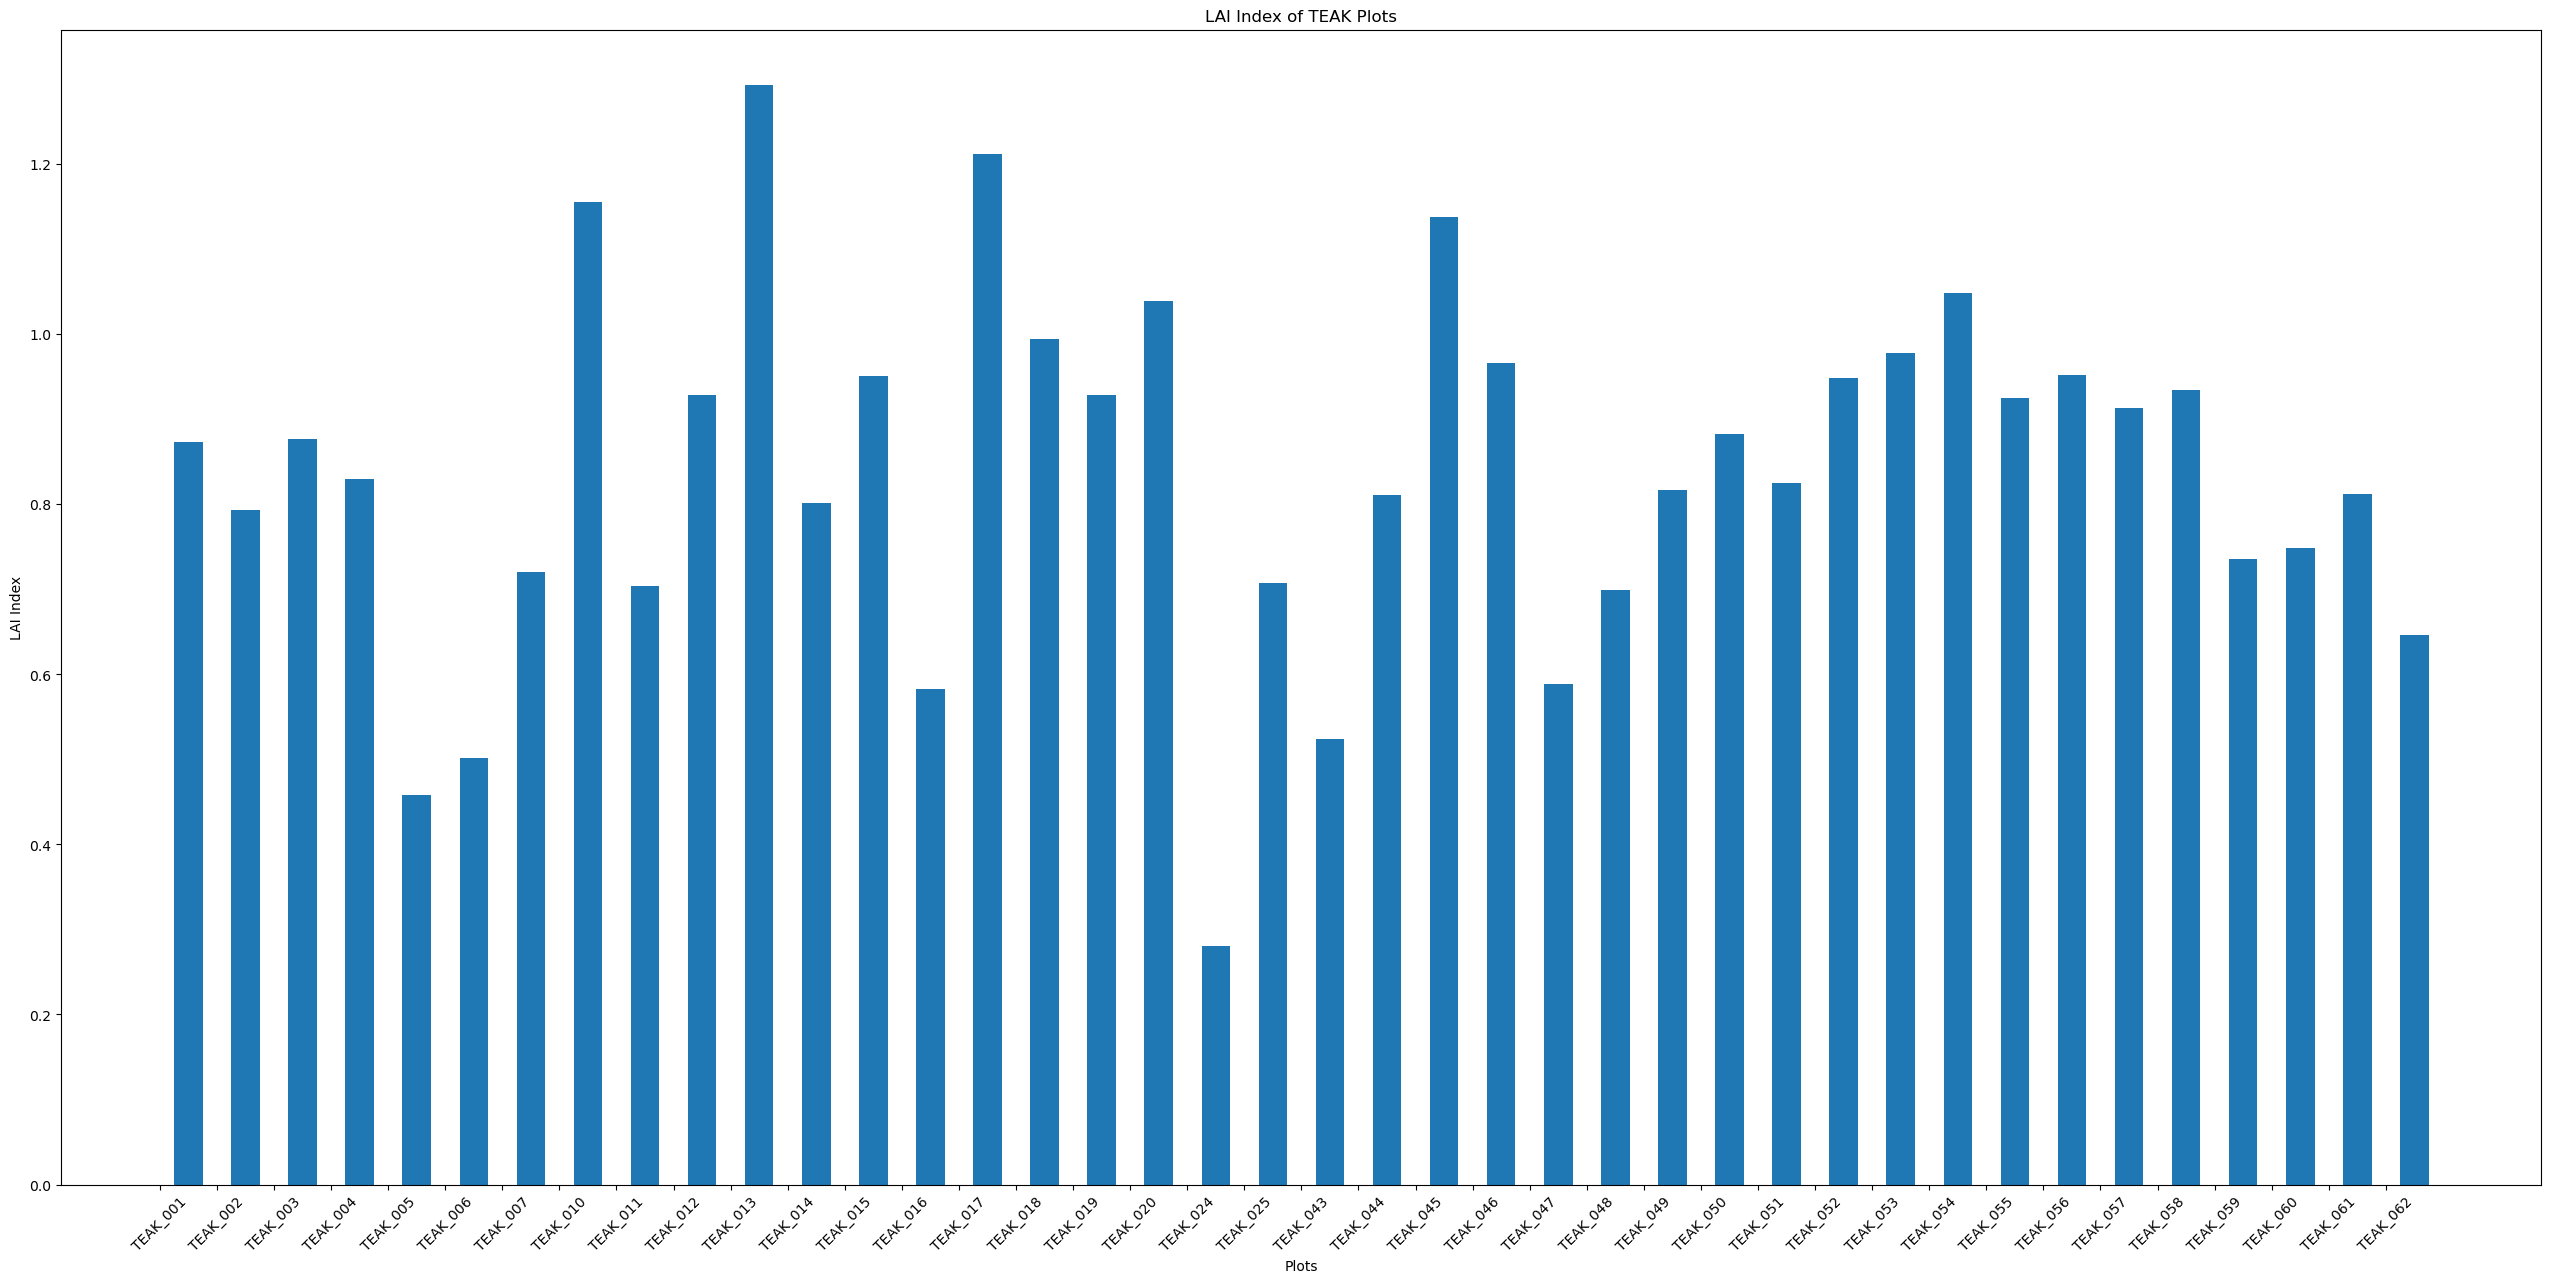

In [7]:
import matplotlib.pyplot as plt

csv_save_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/'
plotloc_csv_filename = 'TEAK_plotloc_uniquemostrecent_abbrev.csv'
output_path = 'C:/Users/allen/OneDrive/Desktop/Work/data/Tree Segmentation/TEAK_LAI/output/'

plot_list = TEAK_plotloc_unique_df['namedLocation']
plot_list_edited = [plot.replace('.basePlot.vst', '') for plot in plot_list]
print (len(plot_list_edited))
print (len(TEAK_plotloc_unique_df['LAI_Average_include_0s']))

TEAK_plotloc_unique_df['namedLocation'] = plot_list_edited
print (TEAK_plotloc_unique_df)

plt.figure(figsize = (32,15))
bars = plt.bar(plot_list_edited, TEAK_plotloc_unique_df['LAI_Average_include_0s'], width = 0.5)

# Calculating the position of the x-ticks
x_pos = [((bar.get_x() + bar.get_width() / 2) - 0.5) for bar in bars]

# Adding labels and title
plt.xlabel('Plots')
plt.ylabel('LAI Index')
plt.xticks(x_pos, plot_list_edited, rotation=45)
plt.title('LAI Index of TEAK Plots')

plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# Save the figure to a file
plt.savefig(output_path + 'LAI_Index.png')

TEAK_plotloc_unique_df.to_csv(csv_save_path + plotloc_csv_filename, index = False)

selected_columns = TEAK_plotloc_unique_df[['namedLocation', 'LAI_Average_include_0s']]
selected_columns['namedLocation'] = selected_columns['namedLocation'] + '.basePlot.vst'


selected_columns.to_csv(csv_save_path + 'TEAK_sites_LAI_Average_only.csv', index = False)